# NYTimes Best Sellers Data
## What trends can be found in best sellers from 2008-2016
Data pulled from http://bestsellers.barabasilab.com/


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Fiction best sellers

fic = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Sprint1_Project/nytb2008-2016/nytb2008-2016Fiction.csv')
fic.head()

,date,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2008-06-08,0553807056,0316068047,0312348673,0399154183,0385517882,0399155007,0446195979,0441015891,1416566384,...,0061160873,0307265730,0061537934,0778325504,0525950605,0061236217,0307265730,0307377040,0385515049,0345501284
1,2008-06-15,0425222195,0316068047,0553807056,0312348673,0399155007,0743290119,0399154183,0385524285,0446195979,...,006123088X,1416566384,0778325504,0061537934,0061160873,0441015891,0060829850,0307265730,0375504338,0307265730
2,2008-06-22,0385340567,0316068047,0399154973,0312348673,0425222195,0743290119,0553807056,0399155007,0399154981,...,0385524285,0446195979,006123088X,0399154183,0061537934,1400066026,0393041654,0375504338,039915504X,1416566384
3,2008-06-29,0316018708,0385340567,0316068047,0399154973,0312348673,0743290119,1416549978,0553807056,0312341814,...,0399154981,0425222195,0061537934,0061374229,0385524285,0385515049,1400066026,0385517882,1594489580,006123088X
4,2008-07-06,0312349513,0316018708,0316068047,0743290119,0312348673,0385340567,0399154973,1416549978,0061374229,...,0670018856,0553807056,0312341814,0399155007,0061537934,0425222195,0385517882,0399154981,1400066026,0446195979


In [6]:
#Nonfiction best sellers

n_fic = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Sprint1_Project/nytb2008-2016/nytb2008-2016Nonfiction.csv')
n_fic.head()

,date,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2008-06-08,0739327302,1416954120,039306235X,0061628018,0446537519,0446537519,1416562451,0767928350,0060798718,...,1592403611,0786865652,0670020745,0312372655,006078234X,0061118184,0307338770,1594201455,0805076034,0446580503
1,2008-06-15,1586485563,0739327302,1416954120,039306235X,0061628018,0670020745,0446537519,0446537519,0385520344,...,1592403611,1416562451,0767927567,159315481X,0767928350,030740515X,0061474622,0446580503,006078234X,0618683356
2,2008-06-22,0316143472,1586485563,039306235X,0739327302,1416954120,0446537519,1592403611,0061628018,1594489947,...,1416562451,0805077928,0312372655,0670020745,0385524382,030740515X,159315481X,0060798718,0446580503,0307395634
3,2008-06-29,0316143472,1586485563,1592403611,0446581194,039306235X,0446537519,1416954120,0739327302,1594489947,...,087113988X,0375424040,0446537519,0446580503,0767928350,0805077928,159315481X,0312372655,0061628018,0307383296
4,2008-07-06,0316143472,1586485563,0446581194,1416954120,1401359652,0739327302,039306235X,1400064805,1594489947,...,1592403611,159315481X,0446537519,030740515X,0061628018,0446580503,1416950737,0061234001,0618683356,0307383296


In [7]:
#Metadata on books

info = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Sprint1_Project/nytb2008-2016/isbnToInfo.csv')
info.head()

,isbn,Author,Category,Author_NY,Title_NY,author_gender
0,0316037915,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Michael Ledwidge,TICK TOCK,multi
1,0446572993,BALDACCI DAVID,Suspense/Thrillers,David Baldacci,THE INNOCENT,male
2,0385341679,MONING KAREN MARIE,Romance,Karen Marie Moning,SHADOWFEVER,female
3,0061374229,WROBLEWSKI DAVID,Fiction General,David Wroblewski,THE STORY OF EDGAR SAWTELLE,male
4,0547386079,LEHRER JONAH,Reference,Jonah Lehrer,IMAGINE,male


In [8]:
new_fic = fic.filter(['date','1'], axis=1) # Breaking DF down to only #1 best seller
new_fic.head()

,date,1
0,2008-06-08,0553807056
1,2008-06-15,0425222195
2,2008-06-22,0385340567
3,2008-06-29,0316018708
4,2008-07-06,0312349513


In [9]:
new_fic.rename(columns={'1':'isbn'},inplace=True)
new_fic.head()

,date,isbn
0,2008-06-08,0553807056
1,2008-06-15,0425222195
2,2008-06-22,0385340567
3,2008-06-29,0316018708
4,2008-07-06,0312349513


In [22]:
f1_books = pd.merge(new_fic, info, how='left', on='isbn') #Join to get meta data on books
f1_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender
0,2008-06-08,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male
1,2008-06-15,0425222195,HAMILTON LAURELL K.,Fantasy,Laurell K Hamilton,BLOOD NOIR,female
2,2008-06-22,0385340567,CHILD LEE,Suspense/Thrillers,Lee Child,NOTHING TO LOSE,male
3,2008-06-29,0316018708,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Howard Roughan,SAIL,multi
4,2008-07-06,0312349513,EVANOVICH JANET,Mystery/Detective,Janet Evanovich,FEARLESS FOURTEEN,female


In [25]:
f1_books['number'] = 1 # Adding column to show these are the #1 books
f1_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male,1
1,2008-06-15,0425222195,HAMILTON LAURELL K.,Fantasy,Laurell K Hamilton,BLOOD NOIR,female,1
2,2008-06-22,0385340567,CHILD LEE,Suspense/Thrillers,Lee Child,NOTHING TO LOSE,male,1
3,2008-06-29,0316018708,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Howard Roughan,SAIL,multi,1
4,2008-07-06,0312349513,EVANOVICH JANET,Mystery/Detective,Janet Evanovich,FEARLESS FOURTEEN,female,1


In [38]:
fic_2 = fic.filter(['date','2'], axis=1)
f2_books = pd.merge(fic_2, info, how='left', left_on='2', right_on='isbn') #Join to get meta data on books
f2_books['number'] = 2 # Adding column to show these are the #2 books
f2_books.drop(columns='2',axis=1, inplace=True)
f2_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0316068047,MEYER STEPHENIE,Science Fiction,Stephenie Meyer,THE HOST,female,2
1,2008-06-15,0316068047,MEYER STEPHENIE,Science Fiction,Stephenie Meyer,THE HOST,female,2
2,2008-06-22,0316068047,MEYER STEPHENIE,Science Fiction,Stephenie Meyer,THE HOST,female,2
3,2008-06-29,0385340567,CHILD LEE,Suspense/Thrillers,Lee Child,NOTHING TO LOSE,male,2
4,2008-07-06,0316018708,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Howard Roughan,SAIL,multi,2


In [39]:
fic_3 = fic.filter(['date','3'], axis=1)
f3_books = pd.merge(fic_3, info, how='left', left_on='3', right_on='isbn') #Join to get meta data on books
f3_books['number'] = 3 # Adding column to show these are the #3 books
f3_books.drop(columns='3',axis=1, inplace=True)
f3_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0312348673,GIFFIN EMILY,Fiction General,Emily Giffin,LOVE THE ONE YOU&#39;RE WITH,female,3
1,2008-06-15,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male,3
2,2008-06-22,0399154973,CUSSLER CLIVE,Action/Adventure,Clive Cussler with Jack Du Brul,PLAGUE SHIP,multi,3
3,2008-06-29,0316068047,MEYER STEPHENIE,Science Fiction,Stephenie Meyer,THE HOST,female,3
4,2008-07-06,0316068047,MEYER STEPHENIE,Science Fiction,Stephenie Meyer,THE HOST,female,3


In [40]:
fic_4 = fic.filter(['date','4'], axis=1)
f4_books = pd.merge(fic_4, info, how='left', left_on='4', right_on='isbn') #Join to get meta data on books
f4_books['number'] = 4 # Adding column to show these are the #4 books
f4_books.drop(columns='4',axis=1, inplace=True)
f4_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0399154183,CORNWELL PATRICIA,Mystery/Detective,Patricia Cornwell,THE FRONT,female,4
1,2008-06-15,0312348673,GIFFIN EMILY,Fiction General,Emily Giffin,LOVE THE ONE YOU&#39;RE WITH,female,4
2,2008-06-22,0312348673,GIFFIN EMILY,Fiction General,Emily Giffin,LOVE THE ONE YOU&#39;RE WITH,female,4
3,2008-06-29,0399154973,CUSSLER CLIVE,Action/Adventure,Clive Cussler with Jack Du Brul,PLAGUE SHIP,multi,4
4,2008-07-06,0743290119,WEISBERGER LAUREN,Fiction General,Lauren Weisberger,CHASING HARRY WINSTON,female,4


In [46]:
fic_5 = fic.filter(['date','5'], axis=1)
f5_books = pd.merge(fic_5, info, how='left', left_on='5', right_on='isbn') #Join to get meta data on books
f5_books['number'] = 5 # Adding column to show these are the #5 books
f5_books.drop(columns='5',axis=1, inplace=True)
f5_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0385517882,PALAHNIUK CHUCK,Fiction General,Chuck Palahniuk,SNUFF,male,5
1,2008-06-15,0399155007,SANDFORD JOHN,Mystery/Detective,James Patterson and Gabrielle Charbonnet,SUNDAYS AT TIFFANY&#39;S,male,5
2,2008-06-22,0425222195,HAMILTON LAURELL K.,Fantasy,Laurell K Hamilton,BLOOD NOIR,female,5
3,2008-06-29,0312348673,GIFFIN EMILY,Fiction General,Emily Giffin,LOVE THE ONE YOU&#39;RE WITH,female,5
4,2008-07-06,0312348673,GIFFIN EMILY,Fiction General,Emily Giffin,LOVE THE ONE YOU&#39;RE WITH,female,5


In [48]:
fic_6 = fic.filter(['date','6'], axis=1)
f6_books = pd.merge(fic_6, info, how='left', left_on='6', right_on='isbn') #Join to get meta data on books
f6_books['number'] = 6 # Adding column to show these are the #6 books
f6_books.drop(columns='6',axis=1, inplace=True)
f6_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0399155007,SANDFORD JOHN,Mystery/Detective,James Patterson and Gabrielle Charbonnet,SUNDAYS AT TIFFANY&#39;S,male,6
1,2008-06-15,0743290119,WEISBERGER LAUREN,Fiction General,Lauren Weisberger,CHASING HARRY WINSTON,female,6
2,2008-06-22,0743290119,WEISBERGER LAUREN,Fiction General,Lauren Weisberger,CHASING HARRY WINSTON,female,6
3,2008-06-29,0743290119,WEISBERGER LAUREN,Fiction General,Lauren Weisberger,CHASING HARRY WINSTON,female,6
4,2008-07-06,0385340567,CHILD LEE,Suspense/Thrillers,Lee Child,NOTHING TO LOSE,male,6


In [51]:
fic_7 = fic.filter(['date','7'], axis=1)
f7_books = pd.merge(fic_7, info, how='left', left_on='7', right_on='isbn') #Join to get meta data on books
f7_books['number'] = 7 # Adding column to show these are the #7 books
f7_books.drop(columns='7',axis=1, inplace=True)
f7_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0446195979,BALDACCI DAVID,Suspense/Thrillers,John Sandford,PHANTOM PREY,male,7
1,2008-06-15,0399154183,CORNWELL PATRICIA,Mystery/Detective,Patricia Cornwell,THE FRONT,female,7
2,2008-06-22,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male,7
3,2008-06-29,1416549978,DEAVER JEFFERY,Mystery/Detective,Jeffery Deaver,THE BROKEN WINDOW,male,7
4,2008-07-06,0399154973,CUSSLER CLIVE,Action/Adventure,Clive Cussler with Jack Du Brul,PLAGUE SHIP,multi,7


In [52]:
fic_8 = fic.filter(['date','8'], axis=1)
f8_books = pd.merge(fic_8, info, how='left', left_on='8', right_on='isbn') #Join to get meta data on books
f8_books['number'] = 8 # Adding column to show these are the #8 books
f8_books.drop(columns='8',axis=1, inplace=True)
f8_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0441015891,HARRIS CHARLAINE,Fantasy,Charlaine Harris,FROM DEAD TO WORSE,female,8
1,2008-06-15,0385524285,FAULKS SEBASTIAN,Action/Adventure,Sebastian Faulks,DEVIL MAY CARE,multi,8
2,2008-06-22,0399155007,SANDFORD JOHN,Mystery/Detective,James Patterson and Gabrielle Charbonnet,SUNDAYS AT TIFFANY&#39;S,male,8
3,2008-06-29,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male,8
4,2008-07-06,1416549978,DEAVER JEFFERY,Mystery/Detective,Jeffery Deaver,THE BROKEN WINDOW,male,8


In [53]:
fic_9 = fic.filter(['date','9'], axis=1)
f9_books = pd.merge(fic_9, info, how='left', left_on='9', right_on='isbn') #Join to get meta data on books
f9_books['number'] = 9 # Adding column to show these are the #9 books
f9_books.drop(columns='9',axis=1, inplace=True)
f9_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,1416566384,CLARK MARY HIGGINS,Suspense/Thrillers,Elizabeth George,CARELESS IN RED,female,9
1,2008-06-15,0446195979,BALDACCI DAVID,Suspense/Thrillers,John Sandford,PHANTOM PREY,male,9
2,2008-06-22,0399154981,GRIFFIN W. E. B.,Mystery/Detective,W E B Griffin and William E Butterworth IV,DEATH AND HONOR,multi,9
3,2008-06-29,0312341814,COLLINS JACKIE,Romance,Jackie Collins,MARRIED LOVERS,female,9
4,2008-07-06,0061374229,WROBLEWSKI DAVID,Fiction General,David Wroblewski,THE STORY OF EDGAR SAWTELLE,male,9


In [54]:
fic_10 = fic.filter(['date','10'], axis=1)
f10_books = pd.merge(fic_10, info, how='left', left_on='10', right_on='isbn') #Join to get meta data on books
f10_books['number'] = 10 # Adding column to show these are the #10 books
f10_books.drop(columns='10',axis=1, inplace=True)
f10_books.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
0,2008-06-08,0778325504,MACOMBER DEBBIE,Romance,David Baldacci,THE WHOLE TRUTH,female,10
1,2008-06-15,0385517882,PALAHNIUK CHUCK,Fiction General,Chuck Palahniuk,SNUFF,male,10
2,2008-06-22,0385517882,PALAHNIUK CHUCK,Fiction General,Chuck Palahniuk,SNUFF,male,10
3,2008-06-29,0399155007,SANDFORD JOHN,Mystery/Detective,James Patterson and Gabrielle Charbonnet,SUNDAYS AT TIFFANY&#39;S,male,10
4,2008-07-06,1416537325,LINDSEY JOHANNA,Romance,Johanna Lindsey,NO CHOICE BUT SEDUCTION,female,10


In [109]:
fiction = pd.merge(f1_books, f2_books, how='outer')
fiction = pd.merge(fiction, f3_books, how='outer')
fiction = pd.merge(fiction, f4_books, how='outer')
fiction = pd.merge(fiction, f5_books, how='outer')
fiction = pd.merge(fiction, f6_books, how='outer')
fiction = pd.merge(fiction, f7_books, how='outer')
fiction = pd.merge(fiction, f8_books, how='outer')
fiction = pd.merge(fiction, f9_books, how='outer')
fiction = pd.merge(fiction, f10_books, how='outer')

In [110]:
fiction.describe(include='all')

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
count,4100,4100,4100,4100,4100,4093,4086,4100.000000
unique,410,1193,353,11,396,1181,4,NaN
top,2015-07-19,1476746583,PATTERSON JAMES,Suspense/Thrillers,John Grisham,ALL THE LIGHT WE CANNOT SEE,male,NaN
freq,10,89,292,1406,135,89,1803,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.500000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.872632
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000


In [116]:
#fiction['date'] = fiction['date'].astype('datetime64[D]')
fiction['date'] = pd.to_datetime(fiction['date'], format = "%Y-%M-%D")
fiction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4100 entries, 0 to 4099
Data columns (total 8 columns):
date             4100 non-null datetime64[ns]
isbn             4100 non-null object
Author           4100 non-null object
Category         4100 non-null object
Author_NY        4100 non-null object
Title_NY         4093 non-null object
author_gender    4086 non-null object
number           4100 non-null int64
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 288.3+ KB


In [123]:
fiction['month'] = fiction['date'].dt.month
fiction['year'] = fiction['date'].dt.year
#fiction['yearMonth'] = fiction['year'].astype(str) + fiction['month']
fiction.head()

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number,month,year
0,2008-06-08,0553807056,KOONTZ DEAN R.,Suspense/Thrillers,Dean R Koontz,ODD HOURS,male,1,6,2008
1,2008-06-15,0425222195,HAMILTON LAURELL K.,Fantasy,Laurell K Hamilton,BLOOD NOIR,female,1,6,2008
2,2008-06-22,0385340567,CHILD LEE,Suspense/Thrillers,Lee Child,NOTHING TO LOSE,male,1,6,2008
3,2008-06-29,0316018708,PATTERSON JAMES,Suspense/Thrillers,James Patterson and Howard Roughan,SAIL,multi,1,6,2008
4,2008-07-06,0312349513,EVANOVICH JANET,Mystery/Detective,Janet Evanovich,FEARLESS FOURTEEN,female,1,7,2008


In [112]:
fiction.describe(include='all')

,date,isbn,Author,Category,Author_NY,Title_NY,author_gender,number
count,4100,4100,4100,4100,4100,4093,4086,4100.000000
unique,410,1193,353,11,396,1181,4,NaN
top,2015-07-19,1476746583,PATTERSON JAMES,Suspense/Thrillers,John Grisham,ALL THE LIGHT WE CANNOT SEE,male,NaN
freq,10,89,292,1406,135,89,1803,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.500000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.872632
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000


In [60]:
fiction.isna().sum()

date              0
isbn              0
Author            0
Category          0
Author_NY         0
Title_NY          7
author_gender    14
number            0
dtype: int64

In [61]:
fiction.Category.unique().tolist()

['Suspense/Thrillers',
 'Fantasy',
 'Mystery/Detective',
 'Romance',
 'Science Fiction',
 'Fiction General',
 'Action/Adventure',
 'Horror/Occult/Psychological',
 'Religious Fiction',
 'Poetry',
 'Western']

In [17]:
f1_books.Category.replace({'Suspense/Thrillers':1,
 'Fantasy':2,
 'Mystery/Detective':3,
 'Romance':4,
 'Science Fiction':5,
 'Fiction General':6,
 'Action/Adventure':7,
 'Horror/Occult/Psychological':8,
 'Religious Fiction':9}, inplace=True)

In [120]:
category = pd.crosstab(fiction['year','month'], fiction['Category'])

KeyError: ('year', 'month')

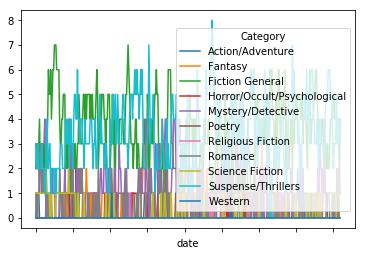

In [69]:
category.plot()

In [70]:
month_bins = pd.cut(fiction['date'], )

TypeError: cut() missing 1 required positional argument: 'bins'